# Unsupervised Clustering for Patient Segmentation in Healthcare
**Author: May Cooper**

## Overview

This project applies k-means clustering to identify distinct groups of patients based on healthcare attributes. The analysis focuses on vitamin D levels, total medical charges, and their interaction, aiming to uncover underlying patterns that may inform care planning or resource allocation. 

Research question:  
How can patients be grouped based on clinical and cost-related variables such as vitamin D levels and total charges to identify distinct profiles that support more targeted and cost-effective care?

## Goal

Prepare the dataset for clustering by:
1. Handling missing values.
2. Retaining only relevant columns for analysis.
3. Creating interaction features (e.g., vitamin D × charges).
4. Scaling numeric variables to a standard range.

In [ ]:
# Data Preparation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'medical_clean.csv'
data = pd.read_csv(file_path)

# Verify initial dataset structure
print(f"Initial dataset shape: {data.shape}")
print(f"Initial dataset columns: {list(data.columns)}")

Initial dataset shape: (10000, 50)
Initial dataset columns: ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


Dataset Variables
- ReAdmis (categorical, dropped for clustering)
- VitD_levels (continuous)
- TotalCharge (continuous)

In [ ]:
# Identify the initial dataset variables
#  Keep relevant columns for analysis
kept_columns = ['ReAdmis', 'VitD_levels', 'TotalCharge']
data = data[kept_columns]
print(f"Kept relevant columns: {kept_columns}")

Kept relevant columns: ['ReAdmis', 'VitD_levels', 'TotalCharge']


In [ ]:
# Drop rows with missing values
print("- Dropping rows with missing values.")
data.dropna(inplace=True)

# Create interaction feature
print("- Creating an interaction feature: [VitD_levels * TotalCharge]")
data['VitD_TotalCharge_Interaction'] = data['VitD_levels'] * data['TotalCharge']

# Drop the target variable 'ReAdmis' as clustering is unsupervised
print("- Dropping the 'ReAdmis' column for clustering.")
data = data.drop(columns=['ReAdmis'])

# Scale numeric features
print("- Scaling numeric features.")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create a DataFrame with scaled data
scaled_columns = data.columns
cleaned_data = pd.DataFrame(scaled_data, columns=scaled_columns)
print("- Data preprocessing complete.")

- Dropping rows with missing values.
- Creating an interaction feature: [VitD_levels * TotalCharge]
- Dropping the 'ReAdmis' column for clustering.
- Scaling numeric features.
- Data preprocessing complete.


In [ ]:
# Saving cleaned dataset to csv
output_file = 'cleaned_medical_data.csv'
print(f"Saving the cleaned dataset to {output_file}")
cleaned_data.to_csv(output_file, index=False)

Saving the cleaned dataset to cleaned_medical_data.csv


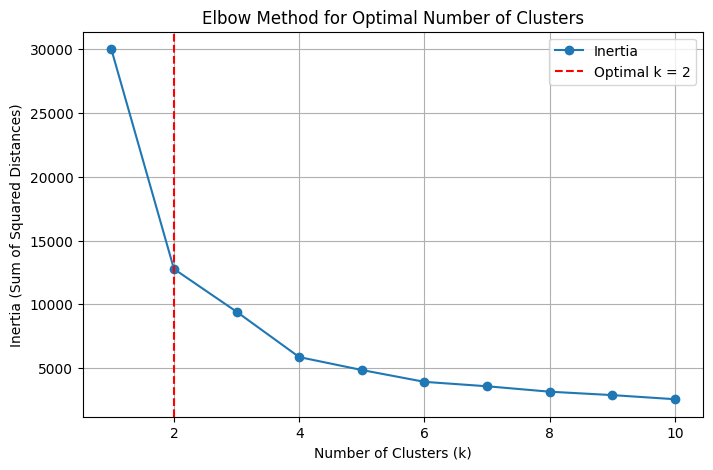

From the elbow plot above, we see a noticeable change in slope around k=2.
We have chosen k=2 for further analysis.


In [5]:
# Inspecting optimal clusters using elbow method
# Annotating to show the number of clusters chosen = 2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Inertia values list
inertia = []
k_range = range(1, 11)

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label="Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid()

# Highlight k=2 as optimal
optimal_k = 2
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.legend()
plt.show()

print("From the elbow plot above, we see a noticeable change in slope around k=2.")
print(f"We have chosen k={optimal_k} for further analysis.")

Silhouette score for k=2: 0.5358
Silhouette score for k=3: 0.4546
Silhouette score for k=4: 0.4337
Silhouette score for k=5: 0.4033
Silhouette score for k=6: 0.3812
Silhouette score for k=7: 0.3526
Silhouette score for k=8: 0.3303
Silhouette score for k=9: 0.3406
Silhouette score for k=10: 0.3478


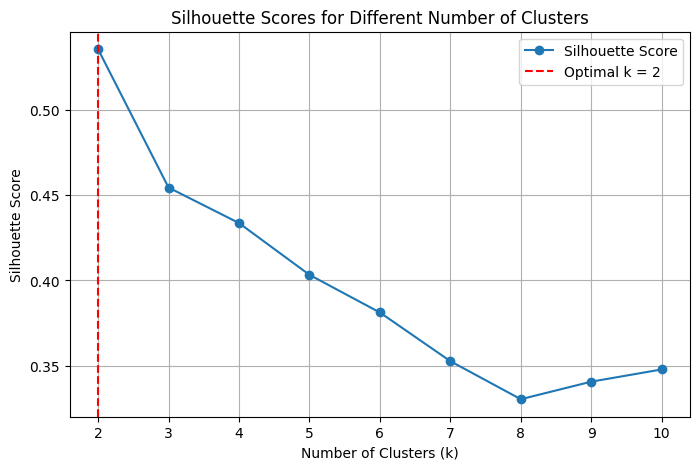

In [6]:
# Plotting silhouette scores
# The silhouette score is a measure of how well-separated the clusters are
from sklearn.metrics import silhouette_score

# List of cluster numbers
range_n_clusters = range(2, 11)
silhouette_scores = []

# Compute silhouette scores for each k
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# Plot silhouette scores with annotation at k=2
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', label="Silhouette Score")
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()

# Highlight k=2 as optimal
optimal_k = 2
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.legend()
plt.show()

In [ ]:
# Choose the optimal number of clusters from the elbow curve
optimal_k = 2  # Optimal number of clusters based on analysis
print(f"Performing k-means clustering with {optimal_k} clusters...")

# Fit KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the cleaned dataset
cleaned_data['Cluster'] = clusters
print("Clusters assigned to the data.")

# Display the number of samples in each cluster
cluster_counts = cleaned_data['Cluster'].value_counts()
print("\nNumber of samples in each cluster:")
print(cluster_counts)

# cluster centers
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)

Performing k-means clustering with 2 clusters...
Clusters assigned to the data.

Number of samples in each cluster:
Cluster
0    5050
1    4950
Name: count, dtype: int64

Cluster Centers (scaled):
[[-0.01117167 -0.93654706 -0.90099452]
 [ 0.01139736  0.95546721  0.91919643]]


Reducing dimensions for visualization using PCA...


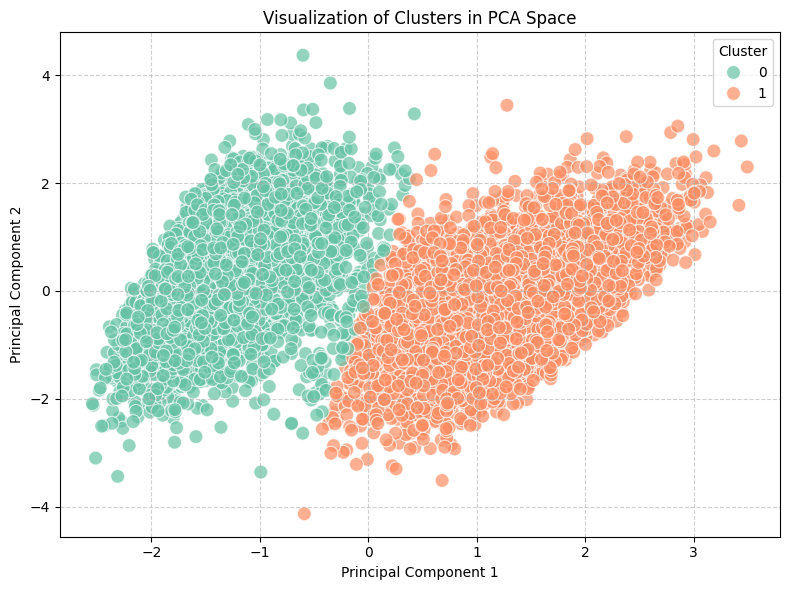

In [ ]:
# Visualization
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Reduce dimensions for visualization using PCA
print("Reducing dimensions for visualization using PCA...")
pca = PCA(n_components=2)  # Reduce data to 2 principal components
data_pca = pca.fit_transform(scaled_data)

# Create a df for visualization
visualization_data = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
visualization_data['Cluster'] = clusters

# Plot the clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=visualization_data,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title("Visualization of Clusters in PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster" , loc='upper right') # legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()